## データの読み込み

csvファイルからの読み込みは、pandasのread_csvを使う  
簡単に内容を表示させたいときは、headを使う

In [1]:
import pandas as pd

In [2]:
customer_master = pd.read_csv("customer_master.csv")
print("customer_master")
customer_master.head()

customer_master


,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [3]:
item_master = pd.read_csv("item_master.csv")
print("item_master")
item_master.head()

item_master


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
transaction_1 = pd.read_csv("transaction_1.csv")
print("transaction_1")
transaction_1.head()

transaction_1


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
transaction_2 = pd.read_csv("transaction_2.csv")
print("transaction_2")
transaction_2.head()

transaction_2


,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [6]:
transaction_detail_1 = pd.read_csv("transaction_detail_1.csv")
print("transaction_detail_1")
transaction_detail_1.head()

transaction_detail_1


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [7]:
transaction_detail_2 = pd.read_csv("transaction_detail_2.csv")
print("transaction_detail_2")
transaction_detail_2.head()

transaction_detail_2


,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


## 先ずはデータの全体像を掴む

どのような目的であっても、共通して、全体像を掴むというステップはまず行いたい  

今回の場合、transaction_idが最も他のテーブルと関係を持っているので、ここを起点に見ていく

## データのユニオン(縦結合)

transaction_1 , transaction_2は同じ内容のテーブルであるためユニオンする  
ユニオンは、同じ列名同士で縦に増やす(行を追加する)結合方法  
  
ユニオンを実現するためにはconcatを用いる

In [8]:
transaction_1.shape

(5000, 4)

In [9]:
transaction_2.shape

(1786, 4)

In [10]:
transaction = pd.concat([transaction_1,transaction_2],ignore_index=True)
print("transaction")
transaction.head()

transaction


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [11]:
transaction.shape

(6786, 4)

$5000 + 1786 = 6786$で行追加出来ていることがわかった

In [12]:
transaction_detail_1.shape

(5000, 4)

In [13]:
transaction_detail_2.shape

(2144, 4)

In [14]:
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2],ignore_index=True)
print("transaction_detail")
transaction_detail.head()

transaction_detail


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [15]:
transaction_detail.shape

(7144, 4)

## データのジョイン(横結合)

ジョインは、二つ以上のテーブルを、  
共通の列で結合したいときに使う結合方式  
列方向にデータが追加(結合)される

pandasのmergeでジョインできる  
  
ジョインをするときは、主軸となるデータは何かを念頭に置く事。  
付加したいデータ、共通しているデータを眺める。  
  
今回の場合は、transaction_detailとtransactionの一部を  
transaction_idをキーにジョインする

In [16]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id","payment_date","customer_id"]],on="transaction_id",how="left")
print("transaction_detail + transaction")
join_data.head()

transaction_detail + transaction


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


transaction_datailとtransactionを結合したので、他も結合できないか見てみる  
  
ここでも重要なのは、  
主軸となるデータは何か  
何が欲しいか  
どこが共通しているか 

In [17]:
sorted(join_data.columns)

['customer_id',
 'detail_id',
 'item_id',
 'payment_date',
 'quantity',
 'transaction_id']

In [18]:
sorted(customer_master.columns)

['age',
 'birth',
 'customer_id',
 'customer_name',
 'customer_name_kana',
 'email',
 'gender',
 'pref',
 'registration_date']

In [19]:
sorted(item_master.columns)

['item_id', 'item_name', 'item_price']

In [20]:
set(join_data.columns) & set(customer_master.columns)

{'customer_id'}

In [21]:
set(join_data.columns) & set(item_master.columns)

{'item_id'}

In [22]:
join_data = pd.merge(join_data,customer_master,on="customer_id",how="left")
join_data = pd.merge(join_data,item_master,on="item_id",how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [23]:
sorted(join_data.columns)

['age',
 'birth',
 'customer_id',
 'customer_name',
 'customer_name_kana',
 'detail_id',
 'email',
 'gender',
 'item_id',
 'item_name',
 'item_price',
 'payment_date',
 'pref',
 'quantity',
 'registration_date',
 'transaction_id']

あえて、transactionテーブルのpriceは結合しなかった  
というのも、priceはその購買全体の金額であるため、  
商品1個当たりの値段item_price と 購入数quantity で計算できる

## 列作成

あえて作成しなかったprice列を、計算によって作成する  
商品1個当たりの値段と、購入数で計算できる

In [24]:
join_data["price"] = join_data["item_price"] * join_data["quantity"]
join_data[["price","item_price","quantity"]].head()

,price,item_price,quantity
0,210000,210000,1
1,50000,50000,1
2,120000,120000,1
3,210000,210000,1
4,170000,85000,2


## データの前準備での注意点

複数のテーブルを結合し、計算によって新しい列を作る時は、  

- 結合前後で整合性が取れているかの確認(データ件数のつじつまが合うかの確認)
- 計算結果が正しいものになっているか検算する

この2つを行う事  
  
データが崩れていたらその後の工程全てが無駄になる

In [25]:
# 検算
join_data["price"].sum() == transaction["price"].sum()

True

## 分析において最初に知るべき2つの数字

データの準備が終わったところで、分析段階に入る  
  
分析段階に入ったら必ず確認する2つの数字がある

- 欠損値
- 全体の統計量

欠損値の確認は、後工程でトラブルが発生しないように行う   
全体の統計量はそれを見る事でその先の分析の手掛かりになるし、  
現状把握にも使える

In [26]:
# 欠損値
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [27]:
# 全体の統計量
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [28]:
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


## グループ別にデータ整理

長期間に及ぶデータを扱う時、  
各時期における経済状況や施策によって、データの質が異なる時がある  
細かい単位でデータを見ていると、ここを見落としがちなので、月別や年別にしてデータの大きな流れを掴む

In [29]:
print([i for i in join_data.columns if "date" in i])

['payment_date', 'registration_date']


In [30]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
# dtを使って、日付を月単位でまとめる
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date","payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [31]:
# 共通するpayment_month同士で和を取り、そのprice列を表示する
join_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [32]:
join_data.groupby("payment_month").mean()["price"]

payment_month
201902    137615.979381
201903    135791.701948
201904    135565.878378
201905    132837.606838
201906    136464.226290
201907    137264.682220
Name: price, dtype: float64

In [33]:
join_data.groupby("payment_month").sum()["quantity"]

payment_month
201902    1403
201903    1427
201904    1421
201905    1390
201906    1446
201907    1485
Name: quantity, dtype: int64

In [34]:
# 共通する月毎に、共通するitem_name毎にまとめる
join_data.groupby(["payment_month","item_name"]).sum()[["price","quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [35]:
join_data.groupby(["item_name","payment_month",]).sum()[["price","quantity"]]

price  quantity
item_name payment_month                    
PC-A      201902         24150000       483
          201903         26000000       520
          201904         25900000       518
          201905         24850000       497
          201906         26000000       520
          201907         25250000       505
PC-B      201902         25245000       297
          201903         25500000       300
          201904         23460000       276
          201905         25330000       298
          201906         23970000       282
          201907         28220000       332
PC-C      201902         19800000       165
          201903         19080000       159
          201904         21960000       183
          201905         20520000       171
          201906         21840000       182
          201907         19440000       162
PC-D      201902         31140000       173
          201903         25740000       143
          201904         24300000       135
          201905         25920000       144
          201906         28800000       160
          201907         26100000       145
PC-E      201902         59850000       285
          201903         64050000       305
          201904         64890000       309
          201905         58800000       280
          201906         63420000       302
          201907         71610000       341

In [36]:
# ピボットテーブルの形で表示することも出来る
pd.pivot_table(join_data,index="item_name",columns="payment_month",values=["price","quantity"],aggfunc="sum")

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

## 可視化する

得られたデータを数字の羅列のままにしておくと、重要な特徴が把握しにくい  
グラフを描くことで、全体的な動きを把握できる

In [37]:
graph_data = pd.pivot_table(join_data,index="payment_month",columns="item_name",values="price",aggfunc="sum")

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
list(graph_data.columns)

['PC-A', 'PC-B', 'PC-C', 'PC-D', 'PC-E']

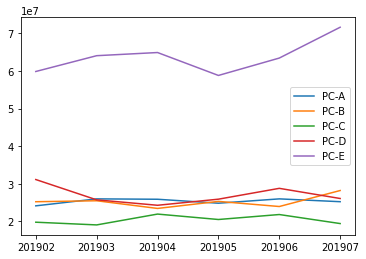

In [40]:
for column in graph_data.columns:
    plt.plot(list(graph_data.index),graph_data[column],label=f"{column}")
plt.legend()

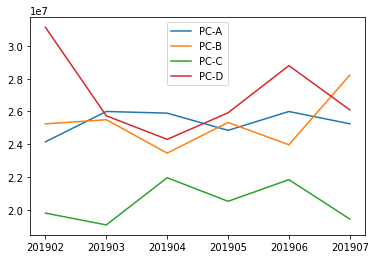

In [41]:
for column in graph_data.columns:
    if column == "PC-E":
        continue
    plt.plot(list(graph_data.index),graph_data[column],label=f"{column}")
plt.legend()